## IMPORT MODULES

In [1]:
## MAKE MATPLOTLIB INLINE
%matplotlib inline

## IMPORT OS
import os

## IMPORT NUMPY
import numpy as np  # Used to do math functions

## FUNCTION TO SAVE AND LOAD PICKLE FILES
from sam_analysis.core.pickles import load_pkl

## IMPORT WATER PROPERTY
from sam_analysis.sam.end_group_density import EndGroupDensity

## IMPORT PLOTTING TOOLS
from sam_analysis.plotting.plots import plot_line

## SET PATHS AND LOAD DATA

In [2]:
## WORKING DIRECTORY
project_dir = r"/mnt/r/simulations/polar_sams/unbiased"
sam_dir     = r"sam_single_12x12_separated_300K_dodecanethiol0.75_C13OH0.25_tip4p_nvt_CHARMM36"
sample_dir  = r"sample1"
output_dir  = r"output_files"
working_dir = os.path.join( project_dir, sam_dir, sample_dir, )

## TRAJ NAME
traj_name   = r"sam_prod"

## INITIALIZE WATER POSITION
obj = EndGroupDensity( sim_working_dir       = working_dir,
                       input_prefix          = traj_name,
                       recompute_sam_density = True, )

## COMPUTE COORDINATION DIST
obj.density()

com1 = obj.end_group_coms
xyz1 = obj.xyz_range
x1 = obj.x
y1 = obj.dist


PKL SAVED TO /mnt/r/simulations/polar_sams/unbiased/sam_single_12x12_separated_300K_dodecanethiol0.75_C13OH0.25_tip4p_nvt_CHARMM36/sample1/output_files/sam_prod_end_group_coms.pkl



In [3]:
## WORKING DIRECTORY
project_dir = r"/mnt/r/simulations/polar_sams/unbiased"
sam_dir     = r"sam_single_12x12_separated_300K_dodecanethiol0.25_C13OH0.75_tip4p_nvt_CHARMM36"
sample_dir  = r"sample1"
output_dir  = r"output_files"
working_dir = os.path.join( project_dir, sam_dir, sample_dir )

## TRAJ NAME
traj_name   = r"sam_prod"

## INITIALIZE WATER POSITION
obj = EndGroupDensity( sim_working_dir       = working_dir,
                       input_prefix          = traj_name,
                       recompute_sam_density = True, )

## COMPUTE COORDINATION DIST
obj.density()


com2 = obj.end_group_coms
xyz2 = obj.xyz_range
x2 = obj.x
y2 = obj.dist

PKL SAVED TO /mnt/r/simulations/polar_sams/unbiased/sam_single_12x12_separated_300K_dodecanethiol0.25_C13OH0.75_tip4p_nvt_CHARMM36/sample1/output_files/sam_prod_end_group_coms.pkl



In [4]:
bin_width = 0.4
x_range = ( xyz1[0][0], xyz1[0][1] )
x = np.arange( x_range[0], x_range[1], bin_width )

## COMPUTE TOTAL DISTRIBUTION
y1 = np.histogram( com1[:,:,0].flatten(), bins = len(x) )
y2 = np.histogram( com2[:,:,0].flatten(), bins = len(x) )

## NORMALIZE
# ALL
c1  = np.max([ np.trapz( y1[0], dx = bin_width ), 1 ])
c2  = np.max([ np.trapz( y2[0], dx = bin_width ), 1 ])
dist1 = y1 / c1 
dist2 = y2 / c2 

/home/bdallin/miniconda3/envs/sam_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]
/home/bdallin/miniconda3/envs/sam_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  



--- CREATING LINE PLOT ---


ValueError: x and y must have same first dimension, but have shapes (13,) and (2,)

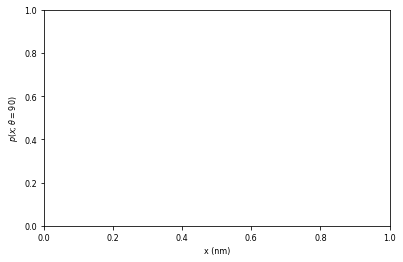

In [5]:
## PLOT LINE
plot_line( [ x, x ], [ dist1, dist2 ],
           yerr        = [],
           xlabel      = r"x (nm)",
           ylabel      = r"$p(x; \theta=90)$",
           xticks      = [ 0, 5.0, 0.5 ],
           yticks      = [ 0.0, 1.0, 0.1 ],
           colors      = [ "slateblue", "tomato" ],
           line_labels = [ "25", "75" ],
           legend_cols = 1,
           fig_path    = None, )

In [ ]:
com2[:,:,0].min()